In [1]:
import pandas as pd
import seaborn as sn
import datetime

In [2]:
columnsNames = ["ID", "ProductID", "ClientID", "Discount", "UnitPrice", "Quantity", "StoreID", "Date"]

In [3]:
sales = pd.read_csv('../data/sales.csv', sep=',', header=None, names=columnsNames)
sales.head(6)

ID                          ProductID  \
NaN NaN                               NaN                                NaN   
    NaN                               NaN                                NaN   
    NaN                               NaN                                NaN   
    NaN                               NaN                                NaN   
    NaN                                ID                          ProductID   
    NaN  80260d682079b6090c8285b398c50d97  002552c0663708129c0019cc97552d7d3   

         ClientID  Discount  UnitPrice  Quantity  StoreID        Date  
NaN NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN  ClientID  Discount  UnitPrice  Quantity  StoreID        Date  
    NaN     14001      0,08      249,2         1        4  12/10/2018

In [16]:
sales.reset_index(drop=True, inplace=True)
df = sales.iloc[5:,0:8] # get the 5 line to the end, and the columns from 0 to 8
df.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
5,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018
6,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019
7,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019
8,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018
9,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019


In [17]:
df['Discount'] = df['Discount'].apply(lambda x: x.replace(',','.'))
df['Discount'] = df['Discount'].apply(lambda x: float(x))

df['UnitPrice'] = df['UnitPrice'].apply(lambda x: x.replace(',','.'))
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x))

df['Quantity'] = df['Quantity'].apply(lambda x: float(x))

df['StoreID'] = df['StoreID'].apply(lambda x: int(x))

df['ClientID'] = df['ClientID'].apply(lambda x: int(x))

In [18]:
# Get sales qty and month infos from the year 2018
dfStore1_2019 = pd.DataFrame(columns=['Profit', 'Month'])
month = list()
profit = list()
for index, row in df.iterrows():
    year = datetime.datetime.strptime(row['Date'], "%m/%d/%Y").year
    # print(year)
    if year == 2019:
        # print('if')
        rProfit = row['Quantity'] * row['UnitPrice']
        profit.append(rProfit)
        month.append(datetime.datetime.strptime(row['Date'], "%m/%d/%Y").month)


In [19]:
dfStore1_2019['Profit'] = profit
dfStore1_2019['Month'] = month

In [20]:
# Sum profit by month
monthProfitSum = list()
monthUnique = dfStore1_2019["Month"].unique()
for i in range(1,13):
    subset_df = dfStore1_2019[dfStore1_2019["Month"] == i]
    # print(subset_df['Month'])
    if subset_df['Profit'].sum() > 0:
        monthProfitSum.append(subset_df['Profit'].sum())


In [21]:
dfStore1_2019_byMonth = pd.DataFrame(columns=['Profit', 'Month'])
dfStore1_2019_byMonth['Profit'] = monthProfitSum
dfStore1_2019_byMonth['Month'] = monthUnique

<AxesSubplot: xlabel='Month', ylabel='Profit'>

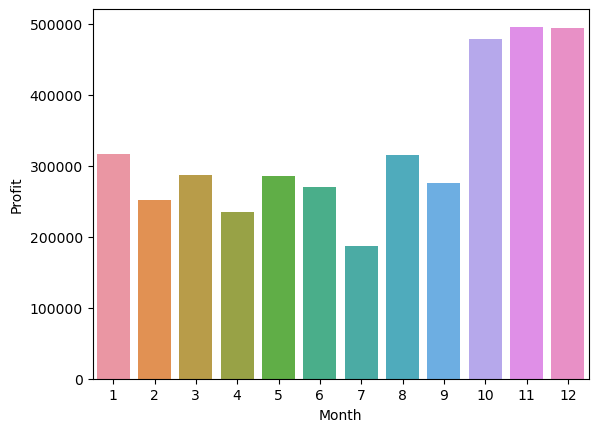

In [23]:
# Plot of profit by month 2019
sn.barplot(data=dfStore1_2019_byMonth, x="Month", y="Profit")

In [24]:
dfStore1_2019_byMonth['Profit'].describe()

count        12.000000
mean     324240.933333
std      105678.209798
min      187203.800000
25%      265072.150000
50%      285989.900000
75%      357271.950000
max      495861.800000
Name: Profit, dtype: float64